**import Libery**

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle

**Upload Data**

In [89]:
cust_data=pd.read_csv('Mall_Customers.csv')

In [90]:
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
#check shape
cust_data.shape

(200, 5)

In [92]:
#check null value
cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [93]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [94]:
#seprate columns
cust_data_1=cust_data.iloc[:,3:5].values

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cust_data_1)

**choosing no of cluster**

In [96]:
#finding wcss vales for diffrent no of cluster
wcss=[]

for i in range(1,11):
    xkmeans=KMeans( n_clusters=i,init='k-means++',random_state=42)
    xkmeans.fit(X_scaled)

    wcss.append(xkmeans.inertia_)

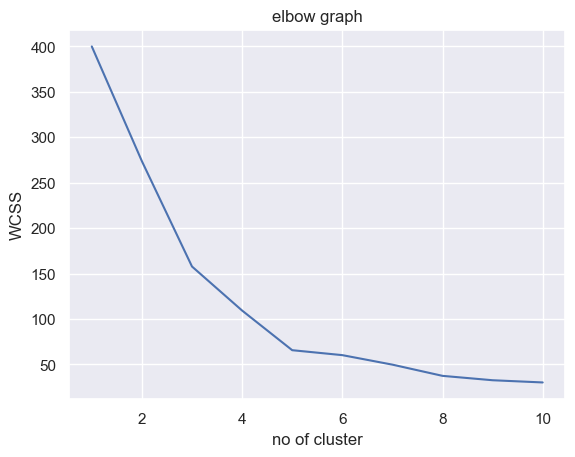

In [97]:
#plot elobow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('elbow graph')
plt.xlabel('no of cluster')
plt.ylabel('WCSS')
plt.show()

**in above we consider optimal no of point is 5 because after that there is no any significatnt point**

**tranning the kmeans clustering model**

In [98]:
xkmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

#label for each data point based on there cluster
y=xkmeans.fit_predict(X_scaled)
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

**now we Visualizing all 5 clusters**

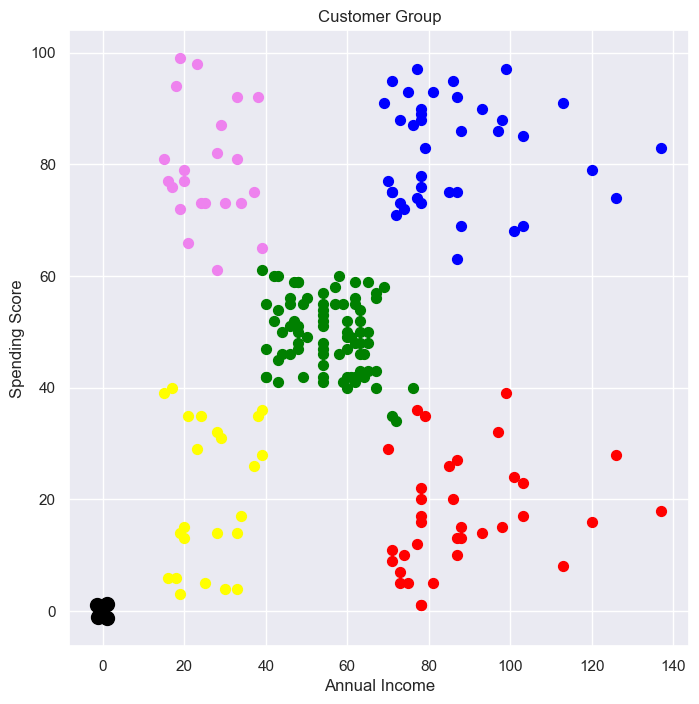

In [99]:
plt.figure(figsize=(8,8))
plt.scatter(cust_data_1[y==0,0],cust_data_1[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(cust_data_1[y==1,0],cust_data_1[y==1,1],s=50,c='blue',label='Cluster 1')
plt.scatter(cust_data_1[y==2,0],cust_data_1[y==2,1],s=50,c='red',label='Cluster 1')
plt.scatter(cust_data_1[y==3,0],cust_data_1[y==3,1],s=50,c='yellow',label='Cluster 1')
plt.scatter(cust_data_1[y==4,0],cust_data_1[y==4,1],s=50,c='violet',label='Cluster 1')
#in above in 1st y==0,0 this is x coordinate 1st 0 is 0 cluster and 2nd 0 is dataset 1st column and in 2nd y==0,1 is y coordinate 

#plot the centroid value
plt.scatter(xkmeans.cluster_centers_[:,0],xkmeans.cluster_centers_[:,1],s=100,c='black',label='Centroid')
#in above 0 is xcentroid point and 1 is y centroid point

plt.title('Customer Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.show()


**in above we undestand one group of less anuual income spending less score and one group is spending more score same for max anuual income, now we have to give some offers or some credit score for that group it will help you to improve your speding score**

**now below we check for age range**

In [15]:
#seprate columns check with age and score

cust_data_1=cust_data[['Age','Spending Score (1-100)']].values

In [16]:
#finding wcss vales for diffrent no of cluster
wcss=[]

for i in range(1,11):
    xkmeans=KMeans( n_clusters=i,init='k-means++',random_state=42)
    xkmeans.fit(cust_data_1)

    wcss.append(xkmeans.inertia_)

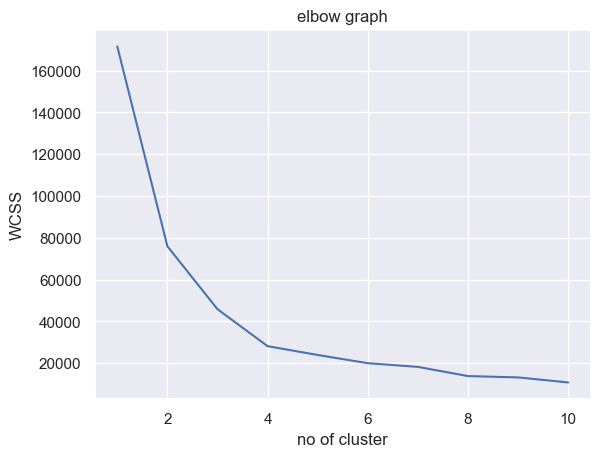

In [17]:
#plot elobow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('elbow graph')
plt.xlabel('no of cluster')
plt.ylabel('WCSS')
plt.show()

In [18]:
xkmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)

#label for each data point based on there cluster
y=xkmeans.fit_predict(cust_data_1)
y

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

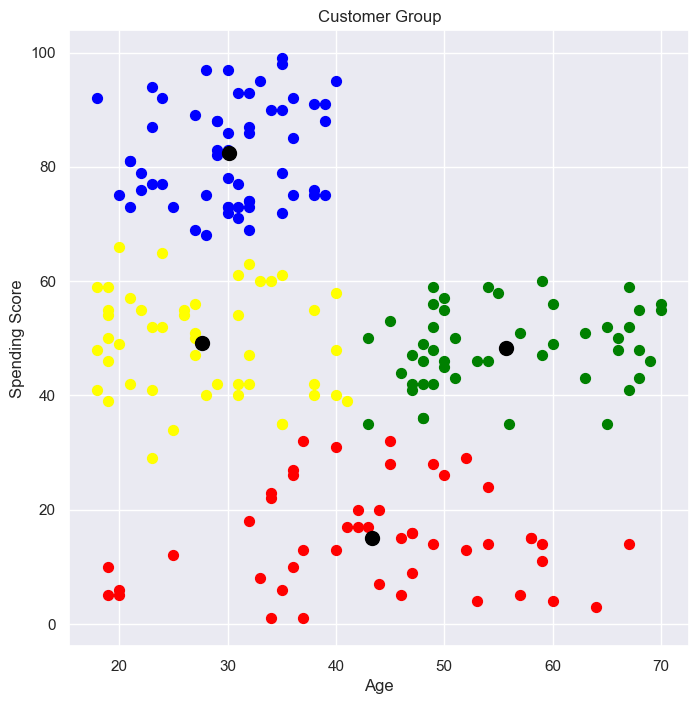

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(cust_data_1[y==0,0],cust_data_1[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(cust_data_1[y==1,0],cust_data_1[y==1,1],s=50,c='blue',label='Cluster 1')
plt.scatter(cust_data_1[y==2,0],cust_data_1[y==2,1],s=50,c='red',label='Cluster 1')
plt.scatter(cust_data_1[y==3,0],cust_data_1[y==3,1],s=50,c='yellow',label='Cluster 1')

#in above in 1st y==0,0 this is x coordinate 1st 0 is 0 cluster and 2nd 0 is dataset 1st column and in 2nd y==0,1 is y coordinate 

#plot the centroid value
plt.scatter(xkmeans.cluster_centers_[:,0],xkmeans.cluster_centers_[:,1],s=100,c='black',label='Centroid')
#in above 0 is xcentroid point and 1 is y centroid point

plt.title('Customer Group')
plt.xlabel('Age')
plt.ylabel('Spending Score')

plt.show()

**in above we undestand more then 40 age people not spending more score for that we have to give some offers for that aged group**

In [101]:
# Save model & scaler
pickle.dump(xkmeans, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [102]:
import os
print(os.getcwd())

C:\Users\Admin


In [103]:
labels = xkmeans.labels_
unique, counts = np.unique(labels, return_counts=True)

for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} customers")


Cluster 0: 81 customers
Cluster 1: 39 customers
Cluster 2: 35 customers
Cluster 3: 23 customers
Cluster 4: 22 customers


In [104]:
centers_original = scaler.inverse_transform(xkmeans.cluster_centers_)
print(centers_original)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]
